In [136]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
import colorsys
import numpy as np

# Dataframe con los datos del .csv ordenados.
df = pd.read_csv('C:/Users/maria/Downloads/HackerRank/colors_and_palettes.csv')

# Información de los datos de las columnas (Necesario durante el tratamiento de datos)
# df.info()

# for index in df.iteritems():
#     print(index[0])

df

,BASE_COLORS,TABLEAU_COLORS,CSS4_COLORS,XKCD_COLORS,PALETTE_COLORS
0,b,tab:blue,aliceblue,xkcd:acid green,Accent
1,c,tab:brown,antiquewhite,xkcd:adobe,Accent_r
2,g,tab:cyan,aqua,xkcd:algae,Blues
3,k,tab:gray,aquamarine,xkcd:algae green,Blues_r
4,m,tab:green,azure,xkcd:almost black,BrBG
...,...,...,...,...,...
944,NaN,NaN,NaN,xkcd:yellowish green,NaN
945,NaN,NaN,NaN,xkcd:yellowish orange,NaN
946,NaN,NaN,NaN,xkcd:yellowish tan,NaN
947,NaN,NaN,NaN,xkcd:yellowy brown,NaN


#bfbf00


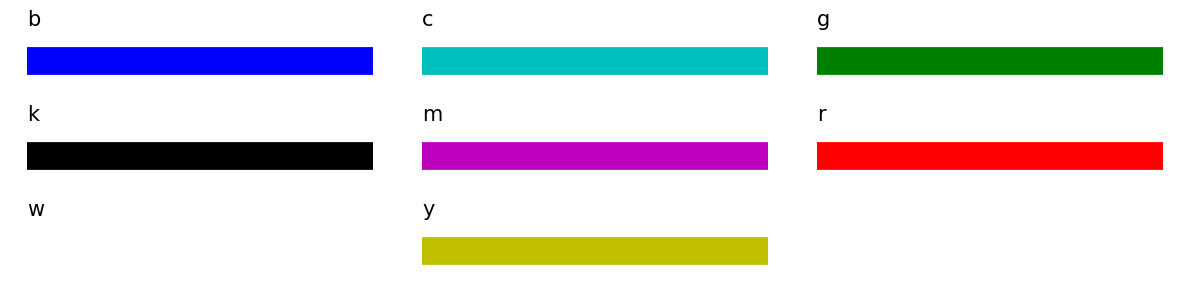

In [146]:


def plotColor(data):

    df['R'] = ""
    df['G'] = ""
    df['B'] = ""

    # Itera el df y añade el valor de RGB de cada color
    for i,color in df[data].dropna().items():
        r,g,b = colors.to_rgb(color)
        colors.rgb_to_hsv((r,g,b))
        df['R'].loc[i] = r
        df['G'].loc[i] = g
        df['B'].loc[i] = b

    print(colors.rgb2hex((r,g,b)))

    # Inicializa nuevo df con la columna pasada como parámetro y las de R,G,B (Sin NaN).
    RGBdf = df[[data,'R', 'G', 'B']].dropna()

    # Ordenamos el df según los valores RGB
    RGBdf.sort_values(by=['R','G','B'], ascending=False)

    # Reinciamos el indice
    # Drop permite poder usar el índice como dato intrínseco del df
    # Inplace permite modificar el df en vez de crear uno nuevo
    RGBdf.reset_index(drop= True, inplace=True)

    # Mostraremos los datos del dataframe
    length = RGBdf.index.stop
    columns = 3
    rows = int(length/columns)+1
    counter = 1

    # Figsize indica ancho y alto
    plt.figure(figsize=(columns*4,rows))

    # Mostramos cada color de la columna
    for color in RGBdf[data]:
        # Inicializamos las medidas del dato que se insertará en la ventana
        plt.subplot(rows, columns, counter)
        plt.axis('off')
        # Medidas del texto, color y tamaño de fuente
        plt.text(0,0.05, color, color = 'black', fontsize = 15)
        # Medidas del cuadro de color
        plt.hlines(0,0,1, color = color ,linestyles = 'solid', linewidth = 20)
        counter += 1

    # Ajustamos las zonas de alredededor de la imagen
    plt.tight_layout()
    plt.show()

    return


plotColor('BASE_COLORS')

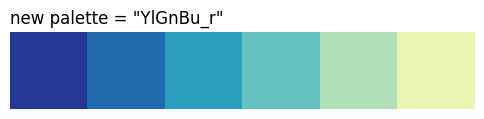

In [138]:
p = 'YlGnBu_r'          # set palette color (from PALETTE_COLOR)
sns.set_palette(p)   # set palette

sns.palplot(sns.color_palette()) # show current palette
plt.title('new palette = \"{}\"'.format(p), loc = 'left')
plt.axis('off')
plt.show()

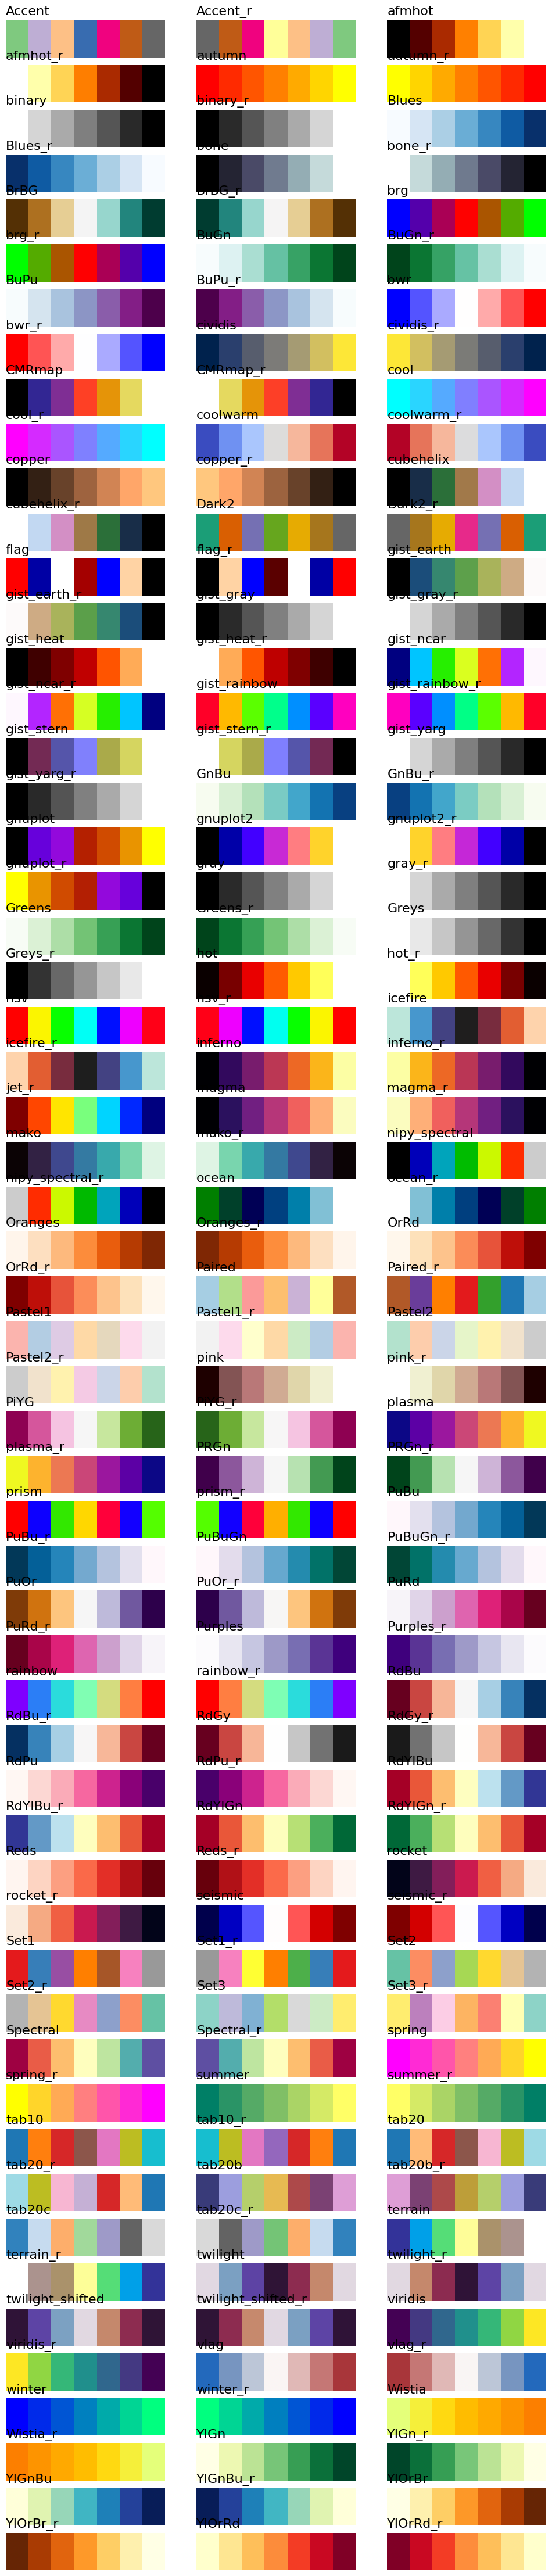

In [140]:
palette = df.PALETTE_COLORS.dropna().sort_values(key = lambda x: x.str.lower())

shades = 7

# 7 divisiones entre el número 0 y 1
grid = np.linspace(0,1,shades)
grid = np.vstack((grid,grid))

columns = 3
rows = int(len(palette)/columns)+1
counter = 1

plt.figure(figsize=(columns*4,rows))

for i in palette:
    plt.subplot(rows, columns, counter)
    plt.imshow(grid, cmap = i, aspect = 'auto')
    plt.axis('off')
    plt.title(i, loc = 'left', fontsize = 16)
    counter += 1
